In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
def get_player_data(csv_name):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_name)

    # Access each column and convert it to a Python list
    right_arm = df['Right Arm Angle'].tolist()
    full_body = df['Full Body Angle'].tolist()
    left_leg = df['Left Leg Angle'].tolist()
    time = [i for i in range(len(right_arm))]
    data = [time, right_arm, full_body, left_leg]
    return data

#Load PRO tennis player
pro_data = get_player_data('Jugador.csv')
#Load USER tennis player
user_data = get_player_data('Jugador2.csv')

In [70]:
#Create dataframe
def get_dataframe(pro_data, user_data):

    # Create lists for your data
    tennist = ["Pro"]*len(pro_data[0]) + ["User"]*len(user_data[0])
    time = pro_data[0] + user_data[0]
    right_arm = pro_data[1] + user_data[1]
    full_body = pro_data[2] + user_data[2]
    left_leg = pro_data[3] + user_data[3]

    # Create a DataFrame by specifying the column names and their corresponding lists
    data = {
        'Tennist': tennist,
        'Time': time,
        'Right Arm Angle': right_arm,
        'Full Body Angle': full_body,
        'Left Leg Angle': left_leg
    }

    df = pd.DataFrame(data)

    # Print the DataFrame
    return df

data = get_dataframe(pro_data, user_data)

#Smoothing
# Set the window size for the rolling average
window_size = 10  # Adjust this to your desired window size

# Specify the columns to smooth
columns_to_smooth = ['Right Arm Angle', 'Full Body Angle', 'Left Leg Angle']
# Apply the rolling average to specific columns
smoothed_data = data.copy()
for column in columns_to_smooth:
    smoothed_data[column] = smoothed_data[column].rolling(window=window_size, min_periods=1).mean()

print(smoothed_data)

    Tennist  Time  Right Arm Angle  Full Body Angle  Left Leg Angle
0       Pro     0       123.098532       126.871449      178.615249
1       Pro     1       124.058067       127.068110      179.126729
2       Pro     2       124.805130       127.265945      179.366532
3       Pro     3       125.291196       127.465571      179.388272
4       Pro     4       125.609892       127.657624      179.291027
..      ...   ...              ...              ...             ...
769    User   290       175.081487       112.869135      146.107742
770    User   291       175.300424       113.500033      147.110257
771    User   292       175.624017       114.080981      148.240626
772    User   293       175.935804       114.337546      149.303547
773    User   294       176.225125       114.425896      150.359247

[774 rows x 5 columns]


In [71]:
#Dinamic Time Warping
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw
def get_paths(smoothed_data):
    path_right_arm = dtw.warping_path(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Right Arm Angle'].tolist(),
                                    smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Right Arm Angle'].tolist())
    path_left_leg = dtw.warping_path(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Left Leg Angle'].tolist(),
                                    smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Left Leg Angle'].tolist())
    path_full_body = dtw.warping_path(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Full Body Angle'].tolist(),
                                    smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Full Body Angle'].tolist())
    return [path_right_arm, path_left_leg, path_full_body]

paths = get_paths(smoothed_data)
print(paths[0])
print(paths[1])
print(paths[2])

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 0), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 0), (58, 0), (59, 0), (60, 0), (61, 0), (62, 0), (63, 0), (64, 0), (65, 0), (66, 0), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 0), (110, 1),

In [72]:
#Test for analyzing distances between points in the data.

def obtain_score(path_list):
    score_list = []
    for path in path_list:
        #First remove all points that are mapped to 0
        path_non_zeros = []
        for point in path:
            if point[0] != 0 and point[1] != 0:
                path_non_zeros.append(point)

        #print("len(path_non_zeros) =", len(path_non_zeros))

        #Now obtain distances for each point
        # Remember that point[0] is the frame from PRO video, and point[1] is the corresponding point in USER video

        # Calculate the 1D distances and store them in a list
        distances = [abs(point[0] - point[1]) for point in path_non_zeros]

        # Calculate the average distance
        average_distance = sum(distances) / len(distances)
        # Normalize by dividing by the max distance in the list
        normalized_avg_distance = average_distance / max(distances)

        #print("1D Distances between points:", distances)
        #print("Average 1D Distance:", average_distance)
        #print("Normalized score = ", normalized_avg_distance)
        #print("")
        score_list.append(normalized_avg_distance)
    return score_list

score_list = obtain_score(get_paths(smoothed_data))

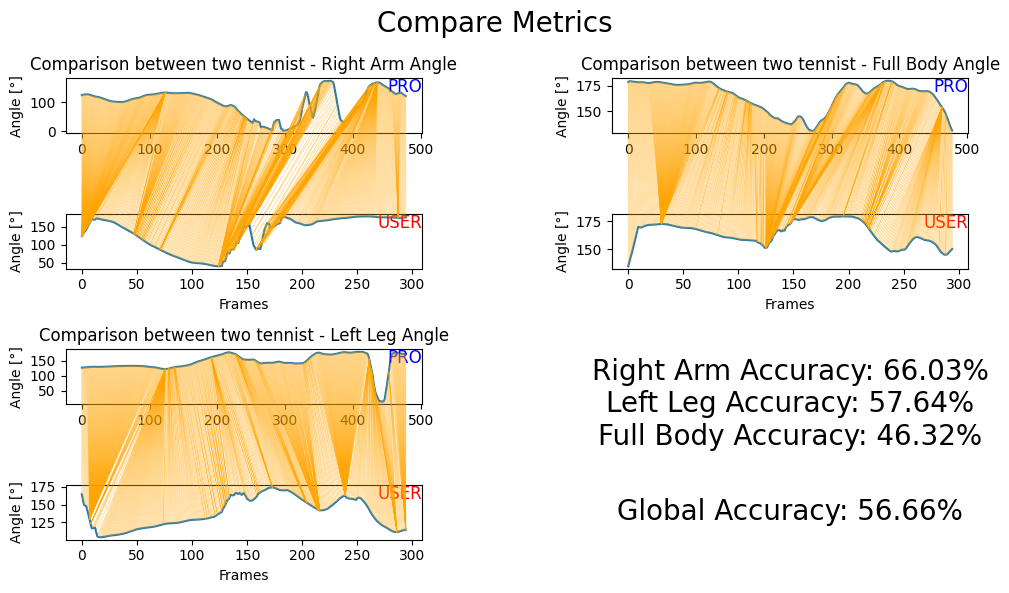

In [73]:
def graph_paths(smoothed_data, path_right_arm, path_left_leg, path_full_body):

    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 6))
    colors = ['blue', 'red']
    data_labels = ['Right Arm Angle', 'Full Body Angle', 'Left Leg Angle']

    # Main Title
    title_kwargs = dict(ha='center', fontsize=20, color='k')
    fig.suptitle('Compare Metrics', **title_kwargs)

    ## Each graph 
    # FIRST PLOT
    dtwvis.plot_warping(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Right Arm Angle'].tolist(),
                        smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Right Arm Angle'].tolist(),
                        path_right_arm, 
                        fig=fig, axs=[ax[0,0], ax[1,0]], warping_line_options={'linewidth': 0.5, 'color': 'orange', 'alpha': 0.5})
    ax[0, 0].set(ylabel='Angle [°]')
    ax[1, 0].set(xlabel='Frames', ylabel='Angle [°]')
    ax[0, 0].set_title('Comparison between two tennist - ' + data_labels[0])
    ax[0, 0].text(1, 1, 'PRO', ha='right', va='top', fontsize=12, color=colors[0], transform=ax[0,0].transAxes)
    ax[1, 0].text(1, 1, 'USER', ha='right', va='top', fontsize=12, color=colors[1], transform=ax[1,0].transAxes)

    # SECOND PLOT
    dtwvis.plot_warping(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Left Leg Angle'].tolist(),
                        smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Left Leg Angle'].tolist(),
                        path_left_leg, 
                        fig=fig, axs=[ax[0,1], ax[1,1]], warping_line_options={'linewidth': 0.5, 'color': 'orange', 'alpha': 0.5})
    ax[0, 1].set(ylabel='Angle [°]')
    ax[1, 1].set(xlabel='Frames', ylabel='Angle [°]')
    ax[0, 1].set_title('Comparison between two tennist - ' + data_labels[1])
    ax[0, 1].text(1, 1, 'PRO', ha='right', va='top', fontsize=12, color=colors[0], transform=ax[0,1].transAxes)
    ax[1, 1].text(1, 1, 'USER', ha='right', va='top', fontsize=12, color=colors[1], transform=ax[1,1].transAxes)

    # THIRD PLOT
    dtwvis.plot_warping(smoothed_data.loc[smoothed_data['Tennist'] == 'Pro', 'Full Body Angle'].tolist(),
                        smoothed_data.loc[smoothed_data['Tennist'] == 'User', 'Full Body Angle'].tolist(),
                        path_full_body, 
                        fig=fig, axs=[ax[2,0], ax[3,0]], warping_line_options={'linewidth': 0.5, 'color': 'orange', 'alpha': 0.5})
    ax[2, 0].set(ylabel='Angle [°]')
    ax[3, 0].set(xlabel='Frames', ylabel='Angle [°]')
    ax[2, 0].set_title('Comparison between two tennist - ' + data_labels[2])
    ax[2, 0].text(1, 1, 'PRO', ha='right', va='top', fontsize=12, color=colors[0], transform=ax[2,0].transAxes)
    ax[3, 0].text(1, 1, 'USER', ha='right', va='top', fontsize=12, color=colors[1], transform=ax[3,0].transAxes)

    # FOURTH PLOT -> Text to show accuracy
    text_kwargs = dict(ha='center', va='center', fontsize=20, color='k')
    acc = 5
    text2show1 =  "Right Arm Accuracy: " + str(round(100*score_list[0],2)) + '%'
    text2show1 += "\n" + "Left Leg Accuracy: " + str(round(100*score_list[1],2)) + '%'
    text2show1 += "\n" + "Full Body Accuracy: " + str(round(100*score_list[2],2)) + '%'
    text2show2 = "Global Accuracy: " + str(round(100*sum(score_list)/len(score_list),2)) + '%'
    ax[2, 1].text(0.5, 0, text2show1 , **text_kwargs) #Understand how it works
    ax[3, 1].text(0, 0, text2show2 , **text_kwargs) #Understand how it works

    #Hide spines and ticks
    ax[2, 1].set_xticks([])
    ax[2, 1].set_yticks([])
    ax[2, 1].spines['top'].set_visible(False)
    ax[2, 1].spines['right'].set_visible(False)
    ax[2, 1].spines['bottom'].set_visible(False)
    ax[2, 1].spines['left'].set_visible(False)
    ax[3, 1].set_xticks([])
    ax[3, 1].set_yticks([])
    ax[3, 1].spines['top'].set_visible(False)
    ax[3, 1].spines['right'].set_visible(False)
    ax[3, 1].spines['bottom'].set_visible(False)
    ax[3, 1].spines['left'].set_visible(False)

    fig.tight_layout()
    plt.plot()
    return fig, ax

graph_paths(smoothed_data, paths[0], paths[1], paths[2])

In [1]:
import tkinter as tk
from tkinter import filedialog

# Create a root window (hidden)
root = tk.Tk()
root.withdraw()

# Open a file dialog
file_path = filedialog.askopenfilename()

# Check if a file was selected
print("file_path[-3:] = ", file_path[-3:])
if file_path:
    print(f"Selected file: {file_path}")
else:
    print("No file selected")

# Remember to destroy the root window
root.destroy()





file_path[-3:] =  mp4
Selected file: C:/Users/HP/Downloads/Videos-20231108T031457Z-001/Videos/Flor1-+30gr.mp4
